In [3]:
from pytrends.request import TrendReq
import pandas as pd
import matplotlib.pyplot as plt
import pickle

###  Open WeatherMap - Dados de São Paulo (2023 - 2024)

In [ ]:
import requests
import time
import pandas as pd

# Configurações
API_KEY = 'cddf7f7572e194d5327fa87f292e13be'
LAT = -23.55052  # Latitude de São Paulo
LON = -46.633308  # Longitude de São Paulo
START_DATE = '2023-12-04'  # Data inicial
END_DATE = '2024-12-04'  # Data final

# Função para gerar timestamps de cada dia no intervalo
def generate_timestamps(start_date, end_date):
    date_range = pd.date_range(start=start_date, end=end_date)
    return [int(date.timestamp()) for date in date_range]

# Lista de timestamps
timestamps = generate_timestamps(START_DATE, END_DATE)

# Lista para armazenar os resultados
weather_data = []

# Requisições para cada dia
for i, ts in enumerate(timestamps):
    try:
        print(f"Requisição {i + 1}/{len(timestamps)} para o timestamp: {ts}")    
        
        url = f"https://api.openweathermap.org/data/3.0/onecall/timemachine?lat={LAT}&lon={LON}&dt={ts}&appid={API_KEY}"
        
        response = requests.get(url, timeout=10)  # Timeout de 10 segundos
        response.raise_for_status()  # Verifica se há erro HTTP
        
        # Processando a resposta
        data = response.json()
        if 'data' in data:
            for entry in data['data']:
                daily_data = {
                    'date': pd.to_datetime(entry['dt'], unit='s'),
                    'temperature': entry['temp'],
                    'humidity': entry['humidity'],
                    'feels_like': entry['feels_like'],
                    'pressure': entry['pressure'],
                    'dew_point': entry['dew_point'],
                    'uvi': entry.get('uvi', None),  # Usando .get() para evitar o KeyError
                    'clouds': entry.get('clouds', None),
                    'visibility': entry.get('visibility', None),
                    'wind_speed': entry.get('wind_speed', None),
                    'wind_deg': entry.get('wind_deg', None),
                    'weather_description': entry['weather'][0].get('description', None) if entry.get('weather') else None,  # Verificando se 'weather' existe
                    'sunrise': pd.to_datetime(entry['sunrise'], unit='s'),
                    'sunset': pd.to_datetime(entry['sunset'], unit='s')
                }
                weather_data.append(daily_data)
        else:
            print(f"Dados ausentes para o timestamp {ts}: {data}")

        time.sleep(1)  # Aguarde 1 segundo para evitar limite da API
        
    except requests.exceptions.RequestException as e:
        print(f"Erro na requisição para o timestamp {ts}: {e}")
        continue  # Pule para o próximo timestamp

# Convertendo para DataFrame
df = pd.DataFrame(weather_data)
print(df)

# Salvando em CSV
df.to_csv('historico_temperatura_umidade_sao_paulo_completo.csv', index=False)

Requisição 1/367 para o timestamp: 1701648000
Requisição 2/367 para o timestamp: 1701734400
Requisição 3/367 para o timestamp: 1701820800
Requisição 4/367 para o timestamp: 1701907200
Requisição 5/367 para o timestamp: 1701993600
Requisição 6/367 para o timestamp: 1702080000
Requisição 7/367 para o timestamp: 1702166400
Requisição 8/367 para o timestamp: 1702252800
Requisição 9/367 para o timestamp: 1702339200
Requisição 10/367 para o timestamp: 1702425600
Requisição 11/367 para o timestamp: 1702512000
Requisição 12/367 para o timestamp: 1702598400
Requisição 13/367 para o timestamp: 1702684800
Requisição 14/367 para o timestamp: 1702771200
Requisição 15/367 para o timestamp: 1702857600
Requisição 16/367 para o timestamp: 1702944000
Requisição 17/367 para o timestamp: 1703030400
Requisição 18/367 para o timestamp: 1703116800
Requisição 19/367 para o timestamp: 1703203200
Requisição 20/367 para o timestamp: 1703289600
Requisição 21/367 para o timestamp: 1703376000
Requisição 22/367 para

In [2]:
import requests
import time
import pandas as pd

# Configurações
API_KEY = 'cddf7f7572e194d5327fa87f292e13be'
LAT = -23.55052  # Latitude de São Paulo
LON = -46.633308  # Longitude de São Paulo
START_DATE = '2020-12-04'  # Data inicial
END_DATE = '2022-12-04'  # Data final

# Função para gerar timestamps de cada dia no intervalo
def generate_timestamps(start_date, end_date):
    date_range = pd.date_range(start=start_date, end=end_date)
    return [int(date.timestamp()) for date in date_range]

# Lista de timestamps
timestamps = generate_timestamps(START_DATE, END_DATE)

# Lista para armazenar os resultados
weather_data_2 = []

# Requisições para cada dia
for i, ts in enumerate(timestamps):
    try:
        print(f"Requisição {i + 1}/{len(timestamps)} para o timestamp: {ts}")    
        
        url = f"https://api.openweathermap.org/data/3.0/onecall/timemachine?lat={LAT}&lon={LON}&dt={ts}&appid={API_KEY}"
        
        response = requests.get(url, timeout=10)  # Timeout de 10 segundos
        response.raise_for_status()  # Verifica se há erro HTTP
        
        # Processando a resposta
        data = response.json()
        if 'data' in data:
            for entry in data['data']:
                daily_data = {
                    'date': pd.to_datetime(entry['dt'], unit='s'),
                    'temperature': entry['temp'],
                    'humidity': entry['humidity'],
                    'feels_like': entry['feels_like'],
                    'pressure': entry['pressure'],
                    'dew_point': entry['dew_point'],
                    'uvi': entry.get('uvi', None),  # Usando .get() para evitar o KeyError
                    'clouds': entry.get('clouds', None),
                    'visibility': entry.get('visibility', None),
                    'wind_speed': entry.get('wind_speed', None),
                    'wind_deg': entry.get('wind_deg', None),
                    'weather_description': entry['weather'][0].get('description', None) if entry.get('weather') else None,  # Verificando se 'weather' existe
                    'sunrise': pd.to_datetime(entry['sunrise'], unit='s'),
                    'sunset': pd.to_datetime(entry['sunset'], unit='s')
                }
                weather_data_2.append(daily_data)
        else:
            print(f"Dados ausentes para o timestamp {ts}: {data}")

        time.sleep(1)  # Aguarde 1 segundo para evitar limite da API
        
    except requests.exceptions.RequestException as e:
        print(f"Erro na requisição para o timestamp {ts}: {e}")
        continue  # Pule para o próximo timestamp

# Convertendo para DataFrame
df_2 = pd.DataFrame(weather_data_2)
print(df_2)

# Salvando em CSV
df_2.to_csv('historico_temperatura_umidade_sao_paulo_3.csv', index=False)

Requisição 1/731 para o timestamp: 1607040000
Requisição 2/731 para o timestamp: 1607126400
Requisição 3/731 para o timestamp: 1607212800
Requisição 4/731 para o timestamp: 1607299200
Requisição 5/731 para o timestamp: 1607385600
Requisição 6/731 para o timestamp: 1607472000
Requisição 7/731 para o timestamp: 1607558400
Requisição 8/731 para o timestamp: 1607644800
Requisição 9/731 para o timestamp: 1607731200
Requisição 10/731 para o timestamp: 1607817600
Requisição 11/731 para o timestamp: 1607904000
Requisição 12/731 para o timestamp: 1607990400
Requisição 13/731 para o timestamp: 1608076800
Requisição 14/731 para o timestamp: 1608163200
Requisição 15/731 para o timestamp: 1608249600
Requisição 16/731 para o timestamp: 1608336000
Requisição 17/731 para o timestamp: 1608422400
Requisição 18/731 para o timestamp: 1608508800
Requisição 19/731 para o timestamp: 1608595200
Requisição 20/731 para o timestamp: 1608681600
Requisição 21/731 para o timestamp: 1608768000
Requisição 22/731 para

### Wether Data - São Paulo

In [26]:
df = pd.read_csv("historico_temperatura_umidade_sao_paulo.csv")
df_2 = pd.read_csv("historico_temperatura_umidade_sao_paulo_2.csv")

In [27]:
# Concatenando os DataFrames verticalmente (linha por linha)
df_clima_sp = pd.concat([df, df_2], ignore_index=True)

df_clima_sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733 entries, 0 to 732
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 733 non-null    object 
 1   temperature          733 non-null    float64
 2   humidity             733 non-null    int64  
 3   feels_like           733 non-null    float64
 4   pressure             733 non-null    int64  
 5   dew_point            733 non-null    float64
 6   uvi                  3 non-null      float64
 7   clouds               733 non-null    int64  
 8   visibility           731 non-null    float64
 9   wind_speed           733 non-null    float64
 10  wind_deg             733 non-null    int64  
 11  weather_description  733 non-null    object 
 12  sunrise              733 non-null    object 
 13  sunset               733 non-null    object 
dtypes: float64(6), int64(4), object(4)
memory usage: 80.3+ KB


In [28]:
df_clima_sp = df_clima_sp.sort_values(by='date', ascending=True)

df_clima_sp.head(10)

date  temperature  humidity  feels_like  pressure  dew_point  uvi  \
367  2022-12-04       293.84       100      294.58      1013     293.84  NaN   
368  2022-12-05       293.85        94      294.43      1013     292.85  NaN   
369  2022-12-06       293.84        94      294.42      1014     292.84  NaN   
370  2022-12-07       292.85       100      293.49      1016     292.85  NaN   
371  2022-12-08       293.00        91      293.42      1014     291.49  NaN   
372  2022-12-09       294.85        56      294.54      1010     285.70  NaN   
373  2022-12-10       295.84        64      295.84      1013     288.69  NaN   
374  2022-12-11       296.85        60      296.84      1012     288.63  NaN   
375  2022-12-12       296.85        78      297.31      1010     292.79  NaN   
376  2022-12-13       293.84        94      294.42      1008     292.84  NaN   

     clouds  visibility  wind_speed  wind_deg weather_description  \
367      20     10000.0        2.57        90          light rain   
368      75     10000.0        3.09        50          light rain   
369      75     10000.0        2.57       360          light rain   
370      75      5000.0        2.57        50     very heavy rain   
371      75      8000.0        3.60       160       broken clouds   
372       0     10000.0        2.06       160           clear sky   
373       0     10000.0        3.09       140           clear sky   
374       0     10000.0        2.06        70           clear sky   
375      75     10000.0        2.06       330       broken clouds   
376       0     10000.0        4.12       340       moderate rain   

                 sunrise               sunset  
367  2022-12-03 08:11:45  2022-12-03 21:41:17  
368  2022-12-04 08:11:51  2022-12-04 21:41:58  
369  2022-12-05 08:11:59  2022-12-05 21:42:39  
370  2022-12-06 08:12:08  2022-12-06 21:43:19  
371  2022-12-07 08:12:18  2022-12-07 21:43:59  
372  2022-12-08 08:12:30  2022-12-08 21:44:39  
373  2022-12-09 08:12:43  2022-12-09 21:45:17  
374  2022-12-10 08:12:58  2022-12-10 21:45:56  
375  2022-12-11 08:13:14  2022-12-11 21:46:33  
376  2022-12-12 08:13:31  2022-12-12 21:47:11

### Transformando em semanal:

In [29]:
import pandas as pd

# Supondo que df_clima_sp seja o seu DataFrame original

# Garantindo que a coluna 'date' está no formato datetime
df_clima_sp['date'] = pd.to_datetime(df_clima_sp['date'])

# Ajustando o fuso horário para São Paulo (UTC-3) nos horários de sunrise e sunset
df_clima_sp['sunrise'] = pd.to_datetime(df_clima_sp['sunrise']) - pd.Timedelta(hours=3)
df_clima_sp['sunset'] = pd.to_datetime(df_clima_sp['sunset']) - pd.Timedelta(hours=3)

# Extrair apenas a hora (HH:MM:SS) de sunrise e sunset
df_clima_sp['sunrise_time'] = df_clima_sp['sunrise'].dt.time
df_clima_sp['sunset_time'] = df_clima_sp['sunset'].dt.time

# Converter o horário para segundos (representação numérica) para realizar a média
df_clima_sp['sunrise_seconds'] = df_clima_sp['sunrise'].dt.hour * 3600 + df_clima_sp['sunrise'].dt.minute * 60 + df_clima_sp['sunrise'].dt.second
df_clima_sp['sunset_seconds'] = df_clima_sp['sunset'].dt.hour * 3600 + df_clima_sp['sunset'].dt.minute * 60 + df_clima_sp['sunset'].dt.second

# Agora, converter a temperatura de Kelvin para Celsius
df_clima_sp['temperature'] = df_clima_sp['temperature'] - 273.15
df_clima_sp['feels_like'] = df_clima_sp['feels_like'] - 273.15
df_clima_sp['dew_point'] = df_clima_sp['dew_point'] - 273.15

# Arredondar para 2 casas decimais
df_clima_sp['temperature'] = df_clima_sp['temperature'].round(2)
df_clima_sp['feels_like'] = df_clima_sp['feels_like'].round(2)
df_clima_sp['dew_point'] = df_clima_sp['dew_point'].round(2)

# Definir a data inicial que será considerada como o começo da primeira semana
start_date = pd.to_datetime('2022-12-04')

# Calcular a diferença de semanas entre a data de cada linha e a data inicial
df_clima_sp['week'] = ((df_clima_sp['date'] - start_date).dt.days // 7) + 1

# Agrupar os dados por semana e calcular a média dos valores numéricos
df_clima_sp_week = df_clima_sp.groupby('week').agg({
    'temperature': 'mean',
    'humidity': 'mean',
    'feels_like': 'mean',
    'pressure': 'mean',
    'clouds': 'mean',
    'wind_speed': 'mean',
    'wind_deg': 'mean',
    'sunrise_seconds': 'mean',
    'sunset_seconds': 'mean',
    'weather_description': lambda x: x.mode()[0]  # Moda para 'weather_description'
})

# Converter 'sunrise_seconds' e 'sunset_seconds' de volta para o formato de hora
df_clima_sp_week['sunrise'] = pd.to_datetime(df_clima_sp_week['sunrise_seconds'], unit='s').dt.strftime('%H:%M:%S')
df_clima_sp_week['sunset'] = pd.to_datetime(df_clima_sp_week['sunset_seconds'], unit='s').dt.strftime('%H:%M:%S')

# Resetando o índice
df_clima_sp_week.reset_index(inplace=True)

# Convertendo a coluna 'week' para uma data de início de semana (como 2022-12-04)
df_clima_sp_week['Semana'] = start_date + pd.to_timedelta((df_clima_sp_week['week'] - 1) * 7, unit='D')

# Salvando em CSV, se necessário
df_clima_sp_week.to_csv('dados_climaticos_semanais_sp.csv', index=False)

In [30]:
df_clima_sp_week.head(10)

week  temperature   humidity  feels_like     pressure     clouds  \
0     1    20.860000  85.571429   21.238571  1013.285714  45.714286   
1     2    19.840000  82.571429   20.035714  1011.714286  48.571429   
2     3    17.690000  89.857143   17.860000  1015.428571  80.714286   
3     4    20.210000  92.428571   20.701429  1015.142857  47.142857   
4     5    18.707143  93.285714   19.068571  1015.000000  59.285714   
5     6    20.311429  89.714286   20.740000  1015.428571  62.857143   
6     7    22.015714  89.857143   22.620000  1015.714286  27.857143   
7     8    22.347143  76.142857   22.627143  1012.428571  25.714286   
8     9    21.385714  92.857143   22.002857  1014.571429  44.285714   
9    10    20.847143  93.428571   21.427143  1015.000000  25.714286   

   wind_speed    wind_deg  sunrise_seconds  sunset_seconds  \
0    2.792857  144.285714     18730.571429    67398.285714   
1    4.657143  190.000000     18831.571429    67665.714286   
2    5.597143  129.857143     18993.571429    67899.000000   
3    3.354286  151.000000     19208.285714    68086.714286   
4    4.054286  158.571429     19465.857143    68219.714286   
5    3.164286  152.857143     19753.571429    68291.285714   
6    3.094286  173.857143     20059.000000    68296.857143   
7    4.134286  127.142857     20369.571429    68235.285714   
8    4.134286  194.285714     20673.428571    68107.142857   
9    3.394286  118.571429     20962.428571    67916.142857   

    weather_description   sunrise    sunset     Semana  
0            light rain  05:12:10  18:43:18 2022-12-04  
1         broken clouds  05:13:51  18:47:45 2022-12-11  
2       overcast clouds  05:16:33  18:51:39 2022-12-18  
3         moderate rain  05:20:08  18:54:46 2022-12-25  
4                  mist  05:24:25  18:56:59 2023-01-01  
5                  mist  05:29:13  18:58:11 2023-01-08  
6                  mist  05:34:19  18:58:16 2023-01-15  
7                  mist  05:39:29  18:57:15 2023-01-22  
8  heavy intensity rain  05:44:33  18:55:07 2023-01-29  
9                  mist  05:49:22  18:51:56 2023-02-05

In [31]:
# Garantindo que as colunas 'sunrise' e 'sunset' estão em datetime
df_clima_sp_week['sunrise'] = pd.to_datetime(df_clima_sp_week['sunrise'])
df_clima_sp_week['sunset'] = pd.to_datetime(df_clima_sp_week['sunset'])

# Convertendo para formato decimal de hora
df_clima_sp_week['sunrise_decimal'] = df_clima_sp_week['sunrise'].dt.hour + df_clima_sp_week['sunrise'].dt.minute / 60 + df_clima_sp_week['sunrise'].dt.second / 3600
df_clima_sp_week['sunset_decimal'] = df_clima_sp_week['sunset'].dt.hour + df_clima_sp_week['sunset'].dt.minute / 60 + df_clima_sp_week['sunset'].dt.second / 3600

# Exibindo os resultados
df_clima_sp_week[['sunrise_decimal', 'sunset_decimal']].head()

C:\Users\danrl\AppData\Local\Temp\ipykernel_4480\424190251.py:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

C:\Users\danrl\AppData\Local\Temp\ipykernel_4480\424190251.py:3: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



sunrise_decimal  sunset_decimal
0         5.202778       18.721667
1         5.230833       18.795833
2         5.275833       18.860833
3         5.335556       18.912778
4         5.406944       18.949722

In [32]:
df_clima_sp_week.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   week                 105 non-null    int64         
 1   temperature          105 non-null    float64       
 2   humidity             105 non-null    float64       
 3   feels_like           105 non-null    float64       
 4   pressure             105 non-null    float64       
 5   clouds               105 non-null    float64       
 6   wind_speed           105 non-null    float64       
 7   wind_deg             105 non-null    float64       
 8   sunrise_seconds      105 non-null    float64       
 9   sunset_seconds       105 non-null    float64       
 10  weather_description  105 non-null    object        
 11  sunrise              105 non-null    datetime64[ns]
 12  sunset               105 non-null    datetime64[ns]
 13  Semana               105 non-null  

In [62]:
import plotly.graph_objects as go

# Criar o gráfico de dispersão interativo
fig_sunrise_temp = go.Figure()

# Adicionar o gráfico de dispersão
fig_sunrise_temp.add_trace(go.Scatter(
    x=df_clima_sp_week['sunrise_decimal'], 
    y=df_clima_sp_week['temperature'], 
    mode='markers',  # Gráfico de dispersão
    marker=dict(color='blue', size=8),  # Cor e tamanho dos pontos
    name='Dispersão Sunrise x Temperatura'  # Nome para a legenda
))

# Atualizar o layout do gráfico
fig_sunrise_temp.update_layout(
    title="Relação entre Sunrise e Temperatura",  # Título do gráfico
    xaxis_title="Hora do Sunrise (segundos desde a meia-noite)",  # Título do eixo X
    yaxis_title="Temperatura (°C)",  # Título do eixo Y
    template="plotly",  # Estilo do gráfico
    showlegend=False,  # Desativar legenda
    height=500,  # Tamanho do gráfico
    width=700,
    margin=dict(l=40, r=40, t=40, b=40),  # Ajuste de margens
)

with open("artefatos/sunrise_temperatura.pkl", "wb") as file:
    pickle.dump(fig_sunrise_temp, file)


# Exibir o gráfico
fig_sunrise_temp.show()

In [34]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Supondo que você já tenha o DataFrame df com os dados coletados, incluindo todas as colunas

# Lista de colunas para plotar (ajuste conforme necessário)
columns_to_plot = ['temperature', 'humidity', 'feels_like', 'pressure', 'clouds', 'wind_speed', 'wind_deg']

# Criar uma figura com subgráficos (linhas) para cada variável
fig_met_tempo = make_subplots(rows=len(columns_to_plot), cols=1, shared_xaxes=True,
                    subplot_titles=[f'{col.capitalize()} ao Longo do Tempo' for col in columns_to_plot])

# Iterando sobre as colunas para adicionar cada gráfico
for i, column in enumerate(columns_to_plot):
    fig_met_tempo.add_trace(
        go.Scatter(x=df_clima_sp_week['Semana'], y=df_clima_sp_week[column], mode='lines', name=column),
        row=i+1, col=1
    )

# Atualizando o layout
fig_met_tempo.update_layout(
    height=300 * len(columns_to_plot),  # Ajuste o tamanho conforme o número de subgráficos
    title_text="Dados Meteorológicos ao Longo do Tempo",  # Título geral
    showlegend=False,  # Desativa a legenda global
    xaxis_title="Data",
    xaxis_rangeslider_visible=True  # Ativa o slider para o eixo x
)

# Ajustando a aparência para cada eixo y
for i, column in enumerate(columns_to_plot):
    fig_met_tempo.update_yaxes(title_text=column.capitalize(), row=i+1, col=1)
    
with open("artefatos/meteorologico_tempo.pkl", "wb") as file:
    pickle.dump(fig_met_tempo, file)

# Exibir o gráfico
fig_met_tempo.show()

In [61]:
import plotly.graph_objects as go

# Criar o gráfico interativo
fig_sunrise_sunset = go.Figure()

# Adicionar o gráfico para sunrise
fig_sunrise_sunset.add_trace(go.Scatter(
    x=df_clima_sp_week['Semana'], 
    y=df_clima_sp_week['sunrise_decimal'], 
    mode='lines+markers',  # Linhas e marcadores
    line=dict(color='orange'),  # Cor da linha do sunrise
    marker=dict(color='orange', size=8),  # Cor e tamanho dos marcadores
    name='Sunrise'  # Nome na legenda
))

# Adicionar o gráfico para sunset
fig_sunrise_sunset.add_trace(go.Scatter(
    x=df_clima_sp_week['Semana'], 
    y=df_clima_sp_week['sunset_decimal'], 
    mode='lines+markers',  # Linhas e marcadores
    line=dict(color='blue'),  # Cor da linha do sunset
    marker=dict(color='blue', size=8),  # Cor e tamanho dos marcadores
    name='Sunset'  # Nome na legenda
))

# Atualizar o layout do gráfico
fig_sunrise_sunset.update_layout(
    title="Hora do Sunrise e Sunset por Semana",  # Título do gráfico
    xaxis_title="Semana",  # Título do eixo X
    yaxis_title="Hora (decimal)",  # Título do eixo Y
    template="plotly",  # Estilo do gráfico
    legend_title="Eventos",  # Título da legenda
    showlegend=True,  # Exibir legenda
    height=400,  # Tamanho reduzido do gráfico (altura)
    width=900,  # Tamanho reduzido do gráfico (largura)
    margin=dict(l=40, r=40, t=40, b=40),  # Ajuste de margens
)

with open("artefatos/sunrise_sunset.pkl", "wb") as file:
    pickle.dump(fig_sunrise_sunset, file)

# Exibir o gráfico
fig_sunrise_sunset.show()

In [60]:
import plotly.express as px

# Criando o gráfico de contagem interativo
fig_descri_semanal = px.histogram(df_clima_sp_week, 
                   x='weather_description', 
                   title="Tempo em São Paulo nos últimos 2 anos (OpenWeather) - Semanal (Moda)",
                   labels={"weather_description": "Descrição do Tempo"},
                   color='weather_description',  # Adicionando cor para as categorias
                   category_orders={"weather_description": sorted(df_clima_sp_week['weather_description'].unique())},  # Ordenação das categorias
                   color_discrete_sequence=px.colors.qualitative.Set2)  # Paleta de cores suave

# Ajustar o layout para deixar o gráfico mais leve
fig_descri_semanal.update_layout(
    xaxis_title="Descrição do Tempo",
    yaxis_title="Contagem",
    height=500,  # Tamanho reduzido do gráfico (altura)
    width=800,  # Tamanho reduzido do gráfico (largura)
    margin=dict(l=40, r=40, t=40, b=40),  # Ajuste de margens
    template="plotly",  # Estilo do gráfico
)

with open("artefatos/descricao_semanal.pkl", "wb") as file:
    pickle.dump(fig_descri_semanal, file)

# Exibir o gráfico
fig_descri_semanal.show()

In [37]:
columns_to_use = ['Semana', 'temperature', 'humidity', 'feels_like', 'sunrise_decimal', 'weather_description', 'sunset_decimal']

In [38]:
df_clima_sp_semana = df_clima_sp_week[columns_to_use].set_index('Semana')

df_clima_sp_semana.head(20)

temperature   humidity  feels_like  sunrise_decimal  \
Semana                                                            
2022-12-04    20.860000  85.571429   21.238571         5.202778   
2022-12-11    19.840000  82.571429   20.035714         5.230833   
2022-12-18    17.690000  89.857143   17.860000         5.275833   
2022-12-25    20.210000  92.428571   20.701429         5.335556   
2023-01-01    18.707143  93.285714   19.068571         5.406944   
2023-01-08    20.311429  89.714286   20.740000         5.486944   
2023-01-15    22.015714  89.857143   22.620000         5.571944   
2023-01-22    22.347143  76.142857   22.627143         5.658056   
2023-01-29    21.385714  92.857143   22.002857         5.742500   
2023-02-05    20.847143  93.428571   21.427143         5.822778   
2023-02-12    21.595714  89.571429   22.148571         5.896944   
2023-02-19    20.230000  95.857143   20.812857         5.964444   
2023-02-26    22.124286  87.857143   22.685714         6.025000   
2023-03-05    21.838571  86.000000   22.324286         6.079444   
2023-03-12    20.641429  92.571429   21.178571         6.128333   
2023-03-19    21.848571  84.428571   22.292857         6.173611   
2023-03-26    21.360000  87.857143   21.844286         6.217222   
2023-04-02    19.631429  88.714286   19.964286         6.260000   
2023-04-09    19.738571  89.857143   20.114286         6.304167   
2023-04-16    18.397143  87.000000   18.564286         6.350556   

             weather_description  sunset_decimal  
Semana                                            
2022-12-04            light rain       18.721667  
2022-12-11         broken clouds       18.795833  
2022-12-18       overcast clouds       18.860833  
2022-12-25         moderate rain       18.912778  
2023-01-01                  mist       18.949722  
2023-01-08                  mist       18.969722  
2023-01-15                  mist       18.971111  
2023-01-22                  mist       18.954167  
2023-01-29  heavy intensity rain       18.918611  
2023-02-05                  mist       18.865556  
2023-02-12             clear sky       18.796389  
2023-02-19            light rain       18.712778  
2023-02-26         broken clouds       18.617222  
2023-03-05             clear sky       18.512500  
2023-03-12         broken clouds       18.400556  
2023-03-19             clear sky       18.285000  
2023-03-26             clear sky       18.168333  
2023-04-02      scattered clouds       18.053611  
2023-04-09            light rain       17.943333  
2023-04-16             clear sky       17.840278

In [40]:
df_clima_sp_semana.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 105 entries, 2022-12-04 to 2024-12-01
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   temperature          105 non-null    float64
 1   humidity             105 non-null    float64
 2   feels_like           105 non-null    float64
 3   sunrise_decimal      105 non-null    float64
 4   weather_description  105 non-null    object 
 5   sunset_decimal       105 non-null    float64
dtypes: float64(5), object(1)
memory usage: 5.7+ KB


### Nestlé Words

In [41]:
words_cafe = pd.read_csv("google_trends/multiTimeline_cafe.csv").set_index('Semana')
words_gelados = pd.read_csv("google_trends/multiTimeline_gelados.csv").set_index('Semana')
words_n_saudavel = pd.read_csv("google_trends/multiTimeline_n_saudavel.csv").set_index('Semana')
words_saudavel = pd.read_csv("google_trends/multiTimeline_saudavel.csv").set_index('Semana')
words_nestle = pd.read_csv("google_trends/multiTimeline_nestle_nescau.csv").set_index('Semana')
words_nestle_marcas = pd.read_csv("google_trends/multiTimeline_nestle_marcas.csv").set_index('Semana')
words_diversos = pd.read_csv("google_trends/multiTimeline_diversos.csv").set_index('Semana')

In [42]:
words_cafe.head(10)

Nescafé: (São Paulo)  Dolce Gusto: (São Paulo)  Café: (São Paulo)  \
Semana                                                                          
2022-12-04                     1                        25                 67   
2022-12-11                     1                        25                 69   
2022-12-18                     1                        27                 66   
2022-12-25                     1                        23                 67   
2023-01-01                     1                        26                 82   
2023-01-08                     1                        28                 84   
2023-01-15                     1                        22                 79   
2023-01-22                     1                        22                 83   
2023-01-29                     1                        23                 86   
2023-02-05                     1                        26                 83   

            Café solúvel: (São Paulo)  Cafeteira: (São Paulo)  
Semana                                                         
2022-12-04                          1                      30  
2022-12-11                          1                      32  
2022-12-18                          1                      32  
2022-12-25                          1                      31  
2023-01-01                          2                      35  
2023-01-08                          2                      35  
2023-01-15                          1                      31  
2023-01-22                          1                      31  
2023-01-29                          1                      30  
2023-02-05                          1                      33

In [43]:
words_cafe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 2022-12-04 to 2024-12-01
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Nescafé: (São Paulo)       105 non-null    int64
 1   Dolce Gusto: (São Paulo)   105 non-null    int64
 2   Café: (São Paulo)          105 non-null    int64
 3   Café solúvel: (São Paulo)  105 non-null    int64
 4   Cafeteira: (São Paulo)     105 non-null    int64
dtypes: int64(5)
memory usage: 4.9+ KB


In [44]:
words_diversos = words_diversos.replace('<1', 0)  # Substitui '<1' por 0.
words_diversos = words_diversos.astype(int)
words_diversos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 2022-12-04 to 2024-12-01
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Chá: (São Paulo)           105 non-null    int32
 1   Receita: (São Paulo)       105 non-null    int32
 2   Supermercado: (São Paulo)  105 non-null    int32
 3   Cozinhar: (São Paulo)      105 non-null    int32
dtypes: int32(4)
memory usage: 2.5+ KB


In [45]:
words_gelados = words_gelados.replace('<1', 0)  # Substitui '<1' por 0.
words_gelados = words_gelados.astype(int)
words_gelados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 2022-12-04 to 2024-12-01
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Sorvete: (São Paulo)  105 non-null    int32
 1   Gelado: (São Paulo)   105 non-null    int32
 2   Picolé: (São Paulo)   105 non-null    int32
 3   Frutas: (São Paulo)   105 non-null    int32
 4   Mousse: (São Paulo)   105 non-null    int32
dtypes: int32(5)
memory usage: 2.9+ KB


In [46]:
words_n_saudavel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 2022-12-04 to 2024-12-01
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   bolo: (São Paulo)       105 non-null    int64
 1   chocolate: (São Paulo)  105 non-null    int64
 2   doce: (São Paulo)       105 non-null    int64
 3   pizza: (São Paulo)      105 non-null    int64
 4   sobremesa: (São Paulo)  105 non-null    int64
dtypes: int64(5)
memory usage: 4.9+ KB


In [47]:
words_saudavel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 2022-12-04 to 2024-12-01
Data columns (total 5 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Barra de cereal: (São Paulo)       105 non-null    int64
 1   zero açúcar: (São Paulo)           105 non-null    int64
 2   Comida Integral: (São Paulo)       105 non-null    int64
 3   Alimentação Saudável: (São Paulo)  105 non-null    int64
 4   Comida Saudável: (São Paulo)       105 non-null    int64
dtypes: int64(5)
memory usage: 4.9+ KB


In [48]:
words_nestle = words_nestle.replace('<1', 0)  # Substitui '<1' por 0.
words_nestle = words_nestle.astype(int)
words_nestle.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 2022-12-04 to 2024-12-01
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Nestlé: (São Paulo)  105 non-null    int32
 1   Nescau: (São Paulo)  105 non-null    int32
dtypes: int32(2)
memory usage: 1.6+ KB


In [49]:
words_nestle_marcas = words_nestle_marcas.replace('<1', 0)  # Substitui '<1' por 0.
words_nestle_marcas = words_nestle_marcas.astype(int)
words_nestle_marcas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 2022-12-04 to 2024-12-01
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Nesfit: (São Paulo)      105 non-null    int32
 1   Negresco: (São Paulo)    105 non-null    int32
 2   Passatempo: (São Paulo)  105 non-null    int32
 3   Molico: (São Paulo)      105 non-null    int32
 4   Galak: (São Paulo)       105 non-null    int32
dtypes: int32(5)
memory usage: 2.9+ KB


In [50]:
words_cafe["words_cafe_sum"] = words_cafe.sum(axis=1)
words_gelados["words_frio_sum"] = words_gelados.sum(axis=1)
words_n_saudavel["words_n_saudavel_sum"] = words_n_saudavel.sum(axis=1)
words_saudavel["words_saudavel_sum"] = words_saudavel.sum(axis=1)

In [51]:
words_gelados.head()

Sorvete: (São Paulo)  Gelado: (São Paulo)  Picolé: (São Paulo)  \
Semana                                                                       
2022-12-04                    48                   11                    2   
2022-12-11                    49                   13                    2   
2022-12-18                    75                   27                    1   
2022-12-25                    81                   28                    1   
2023-01-01                    45                   11                    2   

            Frutas: (São Paulo)  Mousse: (São Paulo)  words_frio_sum  
Semana                                                                
2022-12-04                   25                   15             101  
2022-12-11                   28                   16             108  
2022-12-18                   46                   70             219  
2022-12-25                   39                   72             221  
2023-01-01                   25                   17             100

## Merge Datasets:

In [52]:
from functools import reduce

# Lista de dataframes a serem combinados
words_data = [df_clima_sp_semana, words_cafe, words_gelados, words_n_saudavel, words_saudavel, words_nestle, words_nestle_marcas, words_diversos]

# Converter todos os índices para datetime
for df in words_data:
    df.index = pd.to_datetime(df.index, errors='coerce')  # 'coerce' converte erros para NaT

# Verifique se os índices foram convertidos corretamente
for df in words_data:
    print(df.index)

DatetimeIndex(['2022-12-04', '2022-12-11', '2022-12-18', '2022-12-25',
               '2023-01-01', '2023-01-08', '2023-01-15', '2023-01-22',
               '2023-01-29', '2023-02-05',
               ...
               '2024-09-29', '2024-10-06', '2024-10-13', '2024-10-20',
               '2024-10-27', '2024-11-03', '2024-11-10', '2024-11-17',
               '2024-11-24', '2024-12-01'],
              dtype='datetime64[ns]', name='Semana', length=105, freq=None)
DatetimeIndex(['2022-12-04', '2022-12-11', '2022-12-18', '2022-12-25',
               '2023-01-01', '2023-01-08', '2023-01-15', '2023-01-22',
               '2023-01-29', '2023-02-05',
               ...
               '2024-09-29', '2024-10-06', '2024-10-13', '2024-10-20',
               '2024-10-27', '2024-11-03', '2024-11-10', '2024-11-17',
               '2024-11-24', '2024-12-01'],
              dtype='datetime64[ns]', name='Semana', length=105, freq=None)
DatetimeIndex(['2022-12-04', '2022-12-11', '2022-12-18', '2022-12-25

In [53]:
def merge_dfs(df1, df2):
    return df1.merge(df2, left_index=True, right_index=True)

# Aplicar a função de merge para todos os DataFrames
df_merged = reduce(merge_dfs, words_data)

df_merged.head()

temperature   humidity  feels_like  sunrise_decimal  \
Semana                                                            
2022-12-04    20.860000  85.571429   21.238571         5.202778   
2022-12-11    19.840000  82.571429   20.035714         5.230833   
2022-12-18    17.690000  89.857143   17.860000         5.275833   
2022-12-25    20.210000  92.428571   20.701429         5.335556   
2023-01-01    18.707143  93.285714   19.068571         5.406944   

           weather_description  sunset_decimal  Nescafé: (São Paulo)  \
Semana                                                                 
2022-12-04          light rain       18.721667                     1   
2022-12-11       broken clouds       18.795833                     1   
2022-12-18     overcast clouds       18.860833                     1   
2022-12-25       moderate rain       18.912778                     1   
2023-01-01                mist       18.949722                     1   

            Dolce Gusto: (São Paulo)  Café: (São Paulo)  \
Semana                                                    
2022-12-04                        25                 67   
2022-12-11                        25                 69   
2022-12-18                        27                 66   
2022-12-25                        23                 67   
2023-01-01                        26                 82   

            Café solúvel: (São Paulo)  ...  Nescau: (São Paulo)  \
Semana                                 ...                        
2022-12-04                          1  ...                   41   
2022-12-11                          1  ...                   44   
2022-12-18                          1  ...                   44   
2022-12-25                          1  ...                   46   
2023-01-01                          2  ...                   44   

            Nesfit: (São Paulo)  Negresco: (São Paulo)  \
Semana                                                   
2022-12-04                   23                     57   
2022-12-11                   23                     37   
2022-12-18                   27                     73   
2022-12-25                   21                     68   
2023-01-01                   31                     34   

            Passatempo: (São Paulo)  Molico: (São Paulo)  Galak: (São Paulo)  \
Semana                                                                         
2022-12-04                       67                   62                  21   
2022-12-11                       80                   45                  26   
2022-12-18                       71                   42                  37   
2022-12-25                       69                   37                  30   
2023-01-01                       67                   37                   0   

            Chá: (São Paulo)  Receita: (São Paulo)  Supermercado: (São Paulo)  \
Semana                                                                          
2022-12-04                 9                    55                         21   
2022-12-11                 9                    61                         16   
2022-12-18                 8                   100                         24   
2022-12-25                 9                    90                         26   
2023-01-01                11                    64                         19   

            Cozinhar: (São Paulo)  
Semana                             
2022-12-04                      3  
2022-12-11                      3  
2022-12-18                      4  
2022-12-25                      4  
2023-01-01                      3  

[5 rows x 41 columns]

In [54]:
print(df_merged.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 105 entries, 2022-12-04 to 2024-12-01
Data columns (total 41 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   temperature                        105 non-null    float64
 1   humidity                           105 non-null    float64
 2   feels_like                         105 non-null    float64
 3   sunrise_decimal                    105 non-null    float64
 4   weather_description                105 non-null    object 
 5   sunset_decimal                     105 non-null    float64
 6   Nescafé: (São Paulo)               105 non-null    int64  
 7   Dolce Gusto: (São Paulo)           105 non-null    int64  
 8   Café: (São Paulo)                  105 non-null    int64  
 9   Café solúvel: (São Paulo)          105 non-null    int64  
 10  Cafeteira: (São Paulo)             105 non-null    int64  
 11  words_cafe_sum                     105 

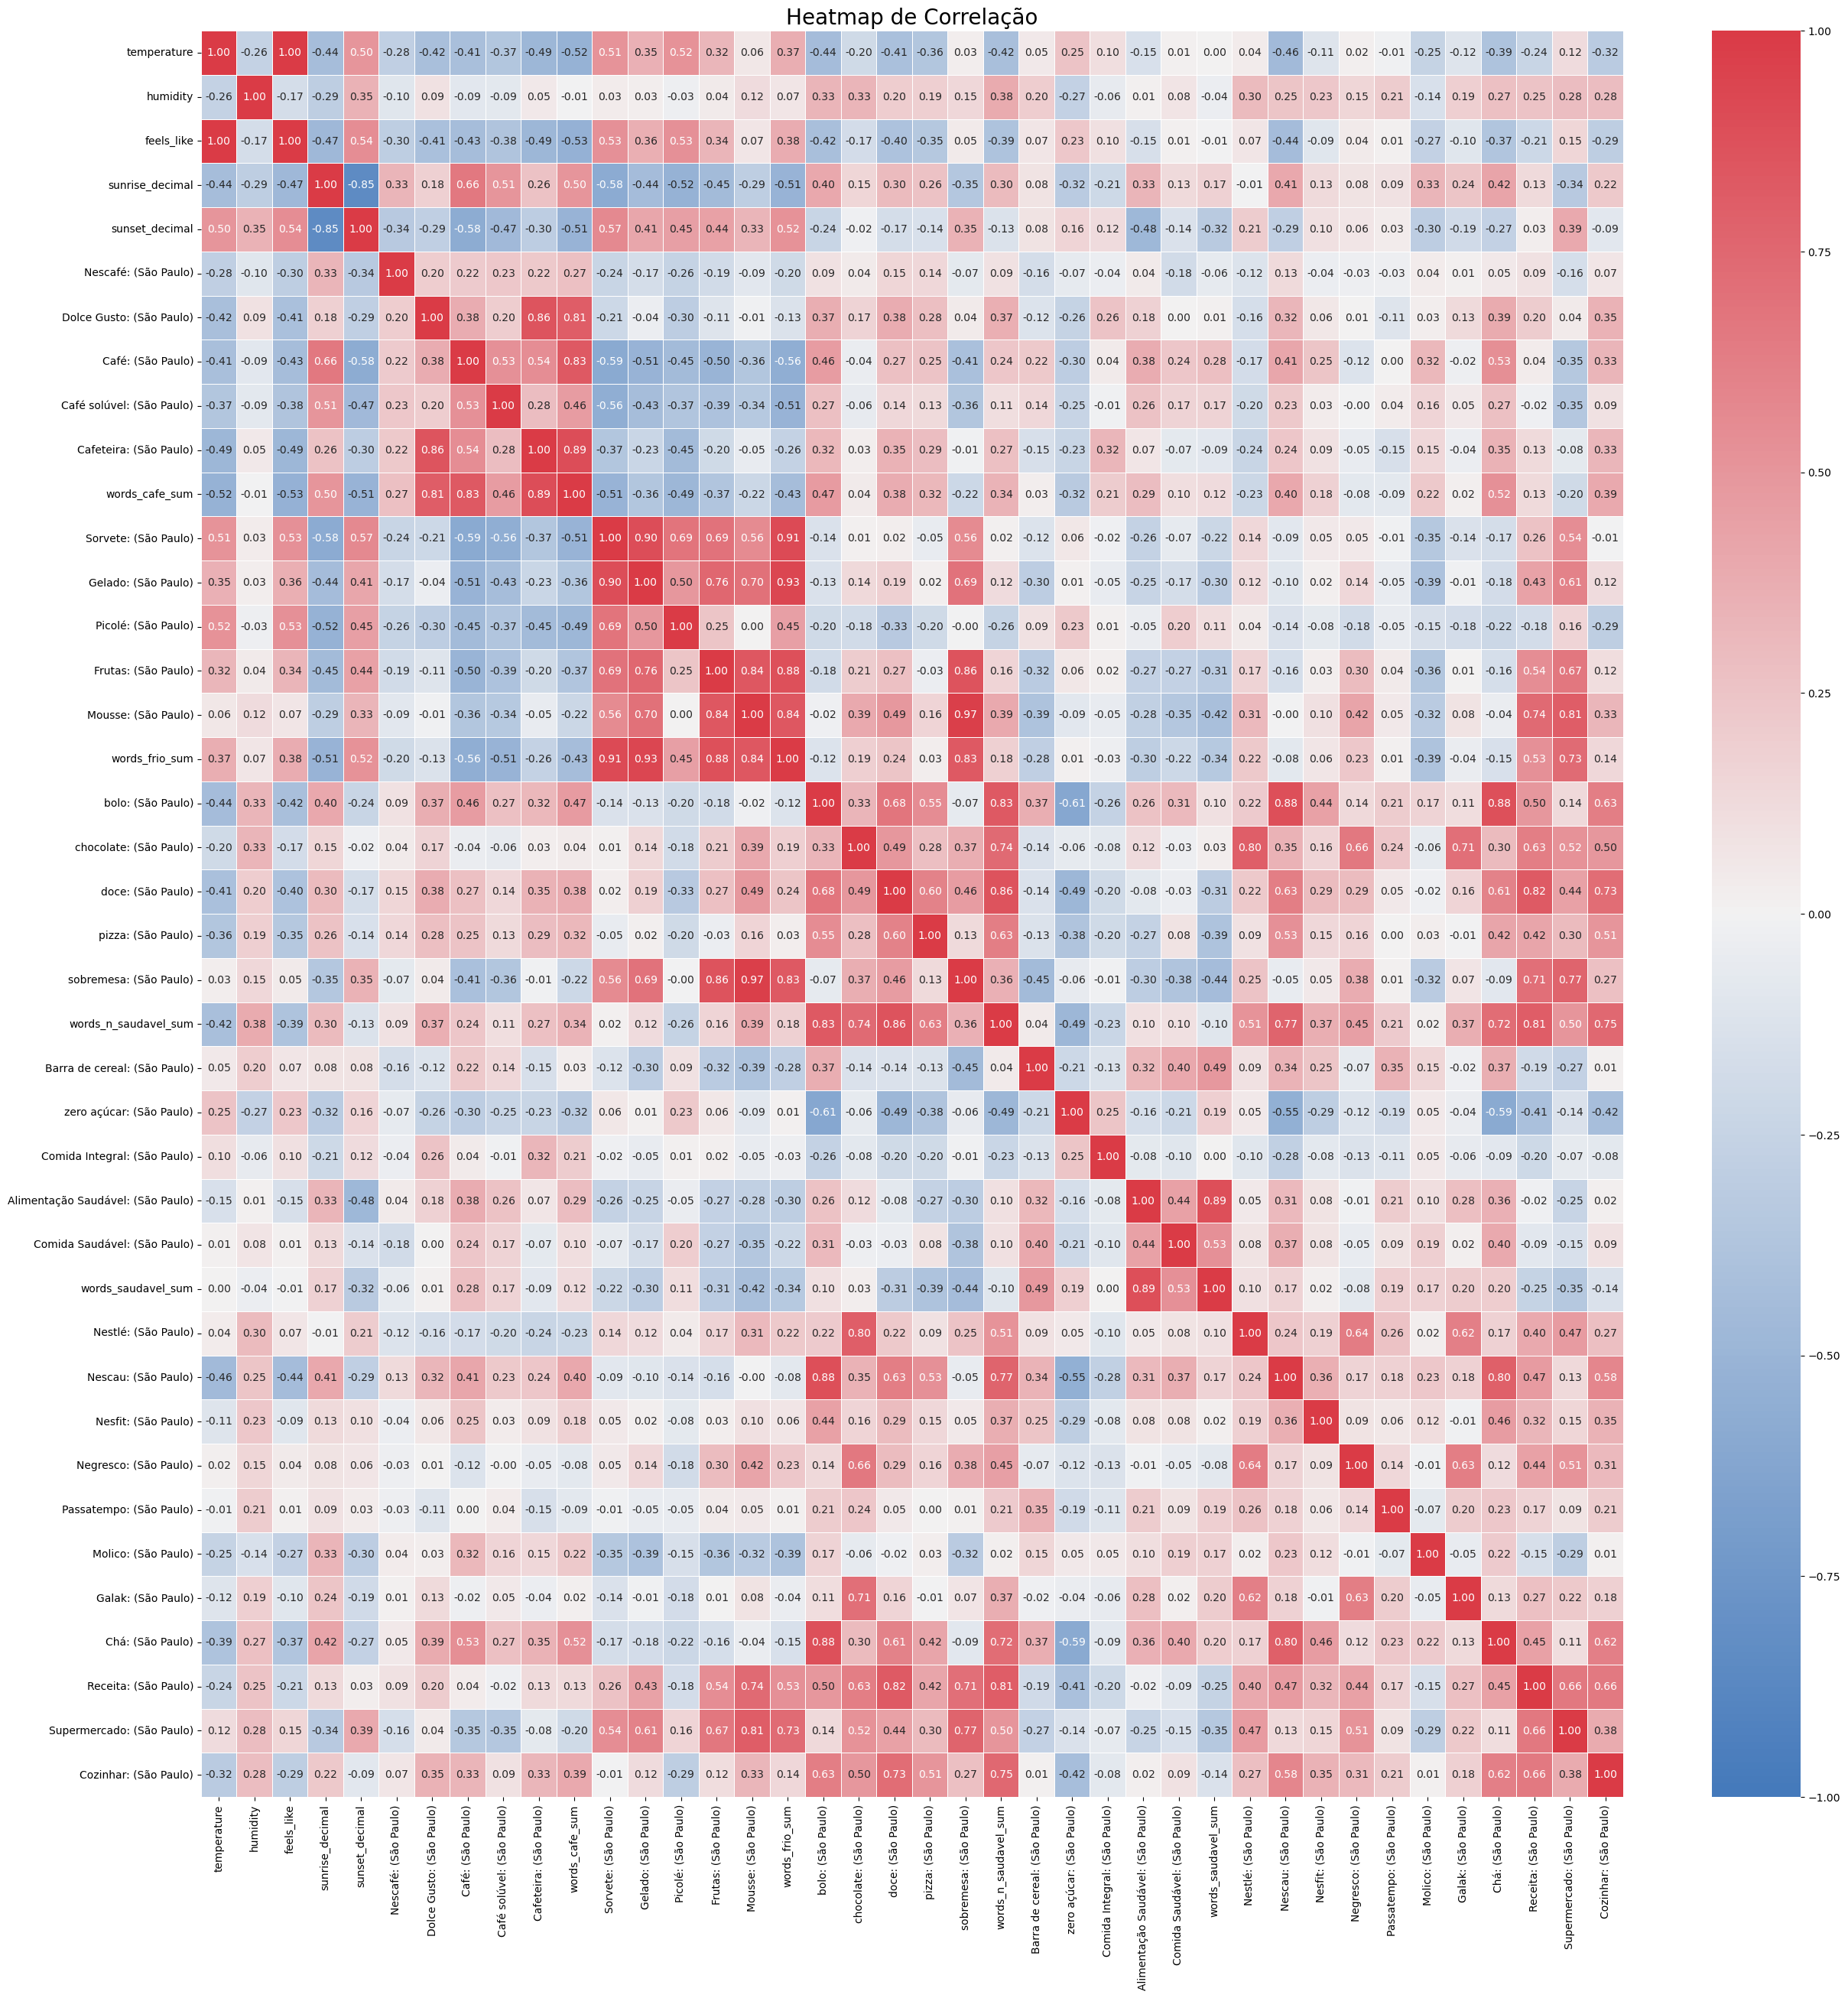

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

# Definindo uma paleta contínua com a combinação de azul e vermelho, com transições mais suaves
smooth_palette = sns.diverging_palette(250, 10, as_cmap=True)

heatmap_fig = plt.figure(figsize=(30, 30))

# Criando o heatmap com a paleta contínua personalizada
sns.heatmap(df_merged.select_dtypes(include=["number"]).corr(), 
            annot=True, 
            cmap=smooth_palette,  # Usando a paleta contínua
            fmt=".2f", 
            linewidths=0.5, 
            center=0,  # Centralizando em 0 para visualização equilibrada
            vmin=-1, vmax=1)  # Definindo os limites para o mapa de cores

plt.title("Heatmap de Correlação", fontsize=20)

with open("artefatos/heatmap.pkl", "wb") as file:
    pickle.dump(heatmap_fig, file)
    
plt.show()

In [56]:
df_merged.columns

Index(['temperature', 'humidity', 'feels_like', 'sunrise_decimal',
       'weather_description', 'sunset_decimal', 'Nescafé: (São Paulo)',
       'Dolce Gusto: (São Paulo)', 'Café: (São Paulo)',
       'Café solúvel: (São Paulo)', 'Cafeteira: (São Paulo)', 'words_cafe_sum',
       'Sorvete: (São Paulo)', 'Gelado: (São Paulo)', 'Picolé: (São Paulo)',
       'Frutas: (São Paulo)', 'Mousse: (São Paulo)', 'words_frio_sum',
       'bolo: (São Paulo)', 'chocolate: (São Paulo)', 'doce: (São Paulo)',
       'pizza: (São Paulo)', 'sobremesa: (São Paulo)', 'words_n_saudavel_sum',
       'Barra de cereal: (São Paulo)', 'zero açúcar: (São Paulo)',
       'Comida Integral: (São Paulo)', 'Alimentação Saudável: (São Paulo)',
       'Comida Saudável: (São Paulo)', 'words_saudavel_sum',
       'Nestlé: (São Paulo)', 'Nescau: (São Paulo)', 'Nesfit: (São Paulo)',
       'Negresco: (São Paulo)', 'Passatempo: (São Paulo)',
       'Molico: (São Paulo)', 'Galak: (São Paulo)', 'Chá: (São Paulo)',
       'Rece

In [57]:
print(df_merged['weather_description'].unique())
print(df_merged['weather_description'].isnull().sum())

['light rain' 'broken clouds' 'overcast clouds' 'moderate rain' 'mist'
 'heavy intensity rain' 'clear sky' 'scattered clouds' 'few clouds']
0


In [58]:
# Verificar se 'weather_description' é categórico
df_merged['weather_description'] = df_merged['weather_description'].astype('category')
print(df_merged['weather_description'].cat.categories)

Index(['broken clouds', 'clear sky', 'few clouds', 'heavy intensity rain',
       'light rain', 'mist', 'moderate rain', 'overcast clouds',
       'scattered clouds'],
      dtype='object')


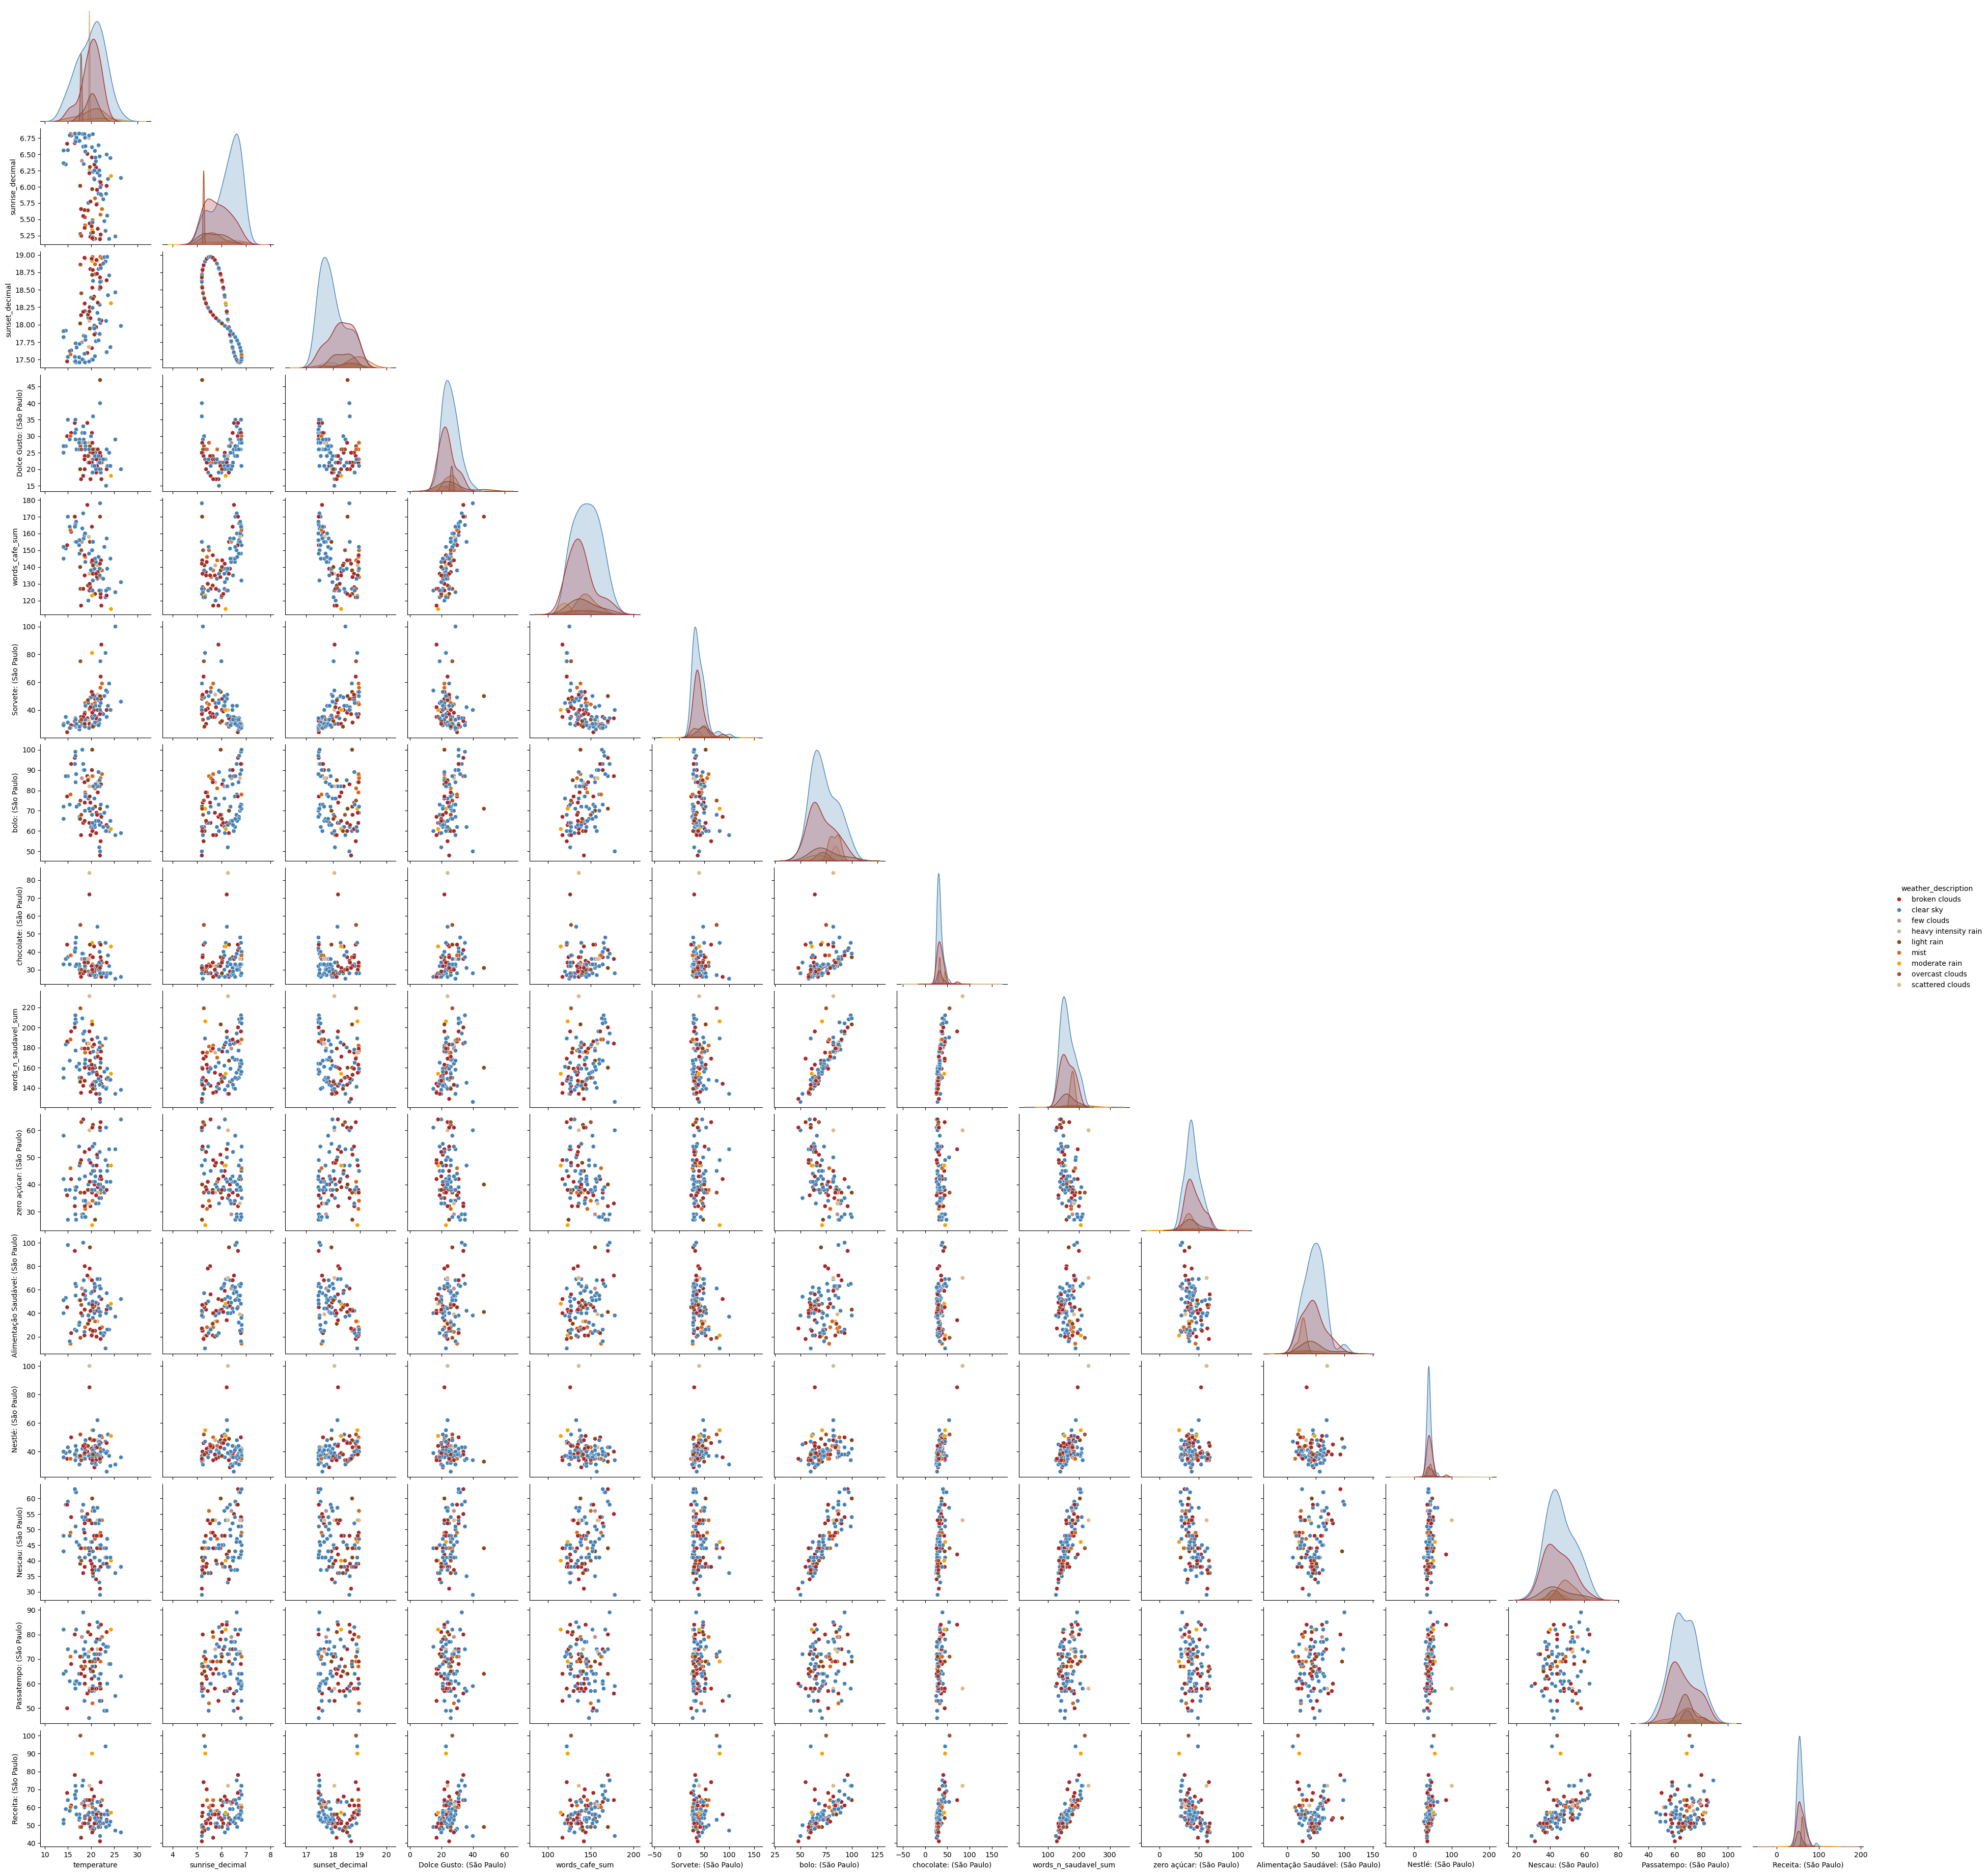

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt


nestle_palette = {
    'clear sky': '#4682B4',            # Azul (cor de destaque)
    'heavy intensity rain': '#D2B48C', # Vermelho (cor de destaque)
    'broken clouds': '#A52A2A',        # Bege (cores suaves)
    'few clouds': '#BC8F8F',           # Marrom claro
    'light rain': '#8B4513',           # Marrom escuro
    'mist': '#D2691E',                 # Laranja quente
    'moderate rain': '#F4A300',        # Amarelo dourado
    'overcast clouds': '#A0522D',      # Marrom terracota
    'scattered clouds': '#DEB887',     # Bege mais neutro
} 

# Verificar e garantir que 'weather_description' seja categórico
df_merged['weather_description'] = df_merged['weather_description'].astype('category')

# Criar o pairplot
pairplot_fig = sns.pairplot(
    df_merged[[
        'temperature', 'sunrise_decimal', 'sunset_decimal', 'weather_description',
        'Dolce Gusto: (São Paulo)', 'words_cafe_sum', 'Sorvete: (São Paulo)',
        'bolo: (São Paulo)', 'chocolate: (São Paulo)', 'words_n_saudavel_sum', 'zero açúcar: (São Paulo)', 'Alimentação Saudável: (São Paulo)',
        'Nestlé: (São Paulo)', 'Nescau: (São Paulo)', 'Passatempo: (São Paulo)', 'Receita: (São Paulo)'
    ]],
    diag_kind="kde",  # Distribuição nas diagonais
    corner=True,      # Mostrar apenas os gráficos abaixo da diagonal principal
    hue='weather_description',  # Cor baseado na descrição do tempo
    palette=nestle_palette,         # Paleta de cores
    height=2.5                  # Tamanho de cada gráfico individual
)

with open("artefatos/pairplot.pkl", "wb") as file:
    pickle.dump(pairplot_fig, file)

# Exibir o plot
plt.show()

## Stramlit

### Google Trends General

In [ ]:
from pytrends.request import TrendReq

# Inicializando a conexão com o Google Trends
pytrends = TrendReq(hl='en-US', tz=360)

# Construindo a carga útil para o Google Trends
pytrends.build_payload(
    kw_list=['Data Science', 'Quantum Computing', 'Virtual Reality'],  # Lista de palavras-chave
    timeframe='2010-01-01 2024-12-06',  # Intervalo de tempo
    #geo=['US', 'BR']  # Geografia: US e BR
)

# Agora você pode usar outras funções para obter dados. Por exemplo:
# Interesse ao longo do tempo
data = pytrends.interest_over_time()
data

In [ ]:
# creating graph
fig, ax = plt.subplots(figsize=(12, 6))
data['Data Science'].plot(color='purple')
data['Quantum Computing'].plot(color='blue')
# adding title and labels
plt.title('Total Google Searches for "Data Science"', fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Total Count')

In [65]:
data = pd.read_csv("multiTimeline.csv")
data

Mês  Quantum Computing: (Mundo)
0    2010-11                          15
1    2010-12                          13
2    2011-01                          16
3    2011-02                          14
4    2011-03                          18
..       ...                         ...
165  2024-08                          58
166  2024-09                          68
167  2024-10                          77
168  2024-11                          90
169  2024-12                         100

[170 rows x 2 columns]

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Mês                         170 non-null    object
 1   Quantum Computing: (Mundo)  170 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.8+ KB


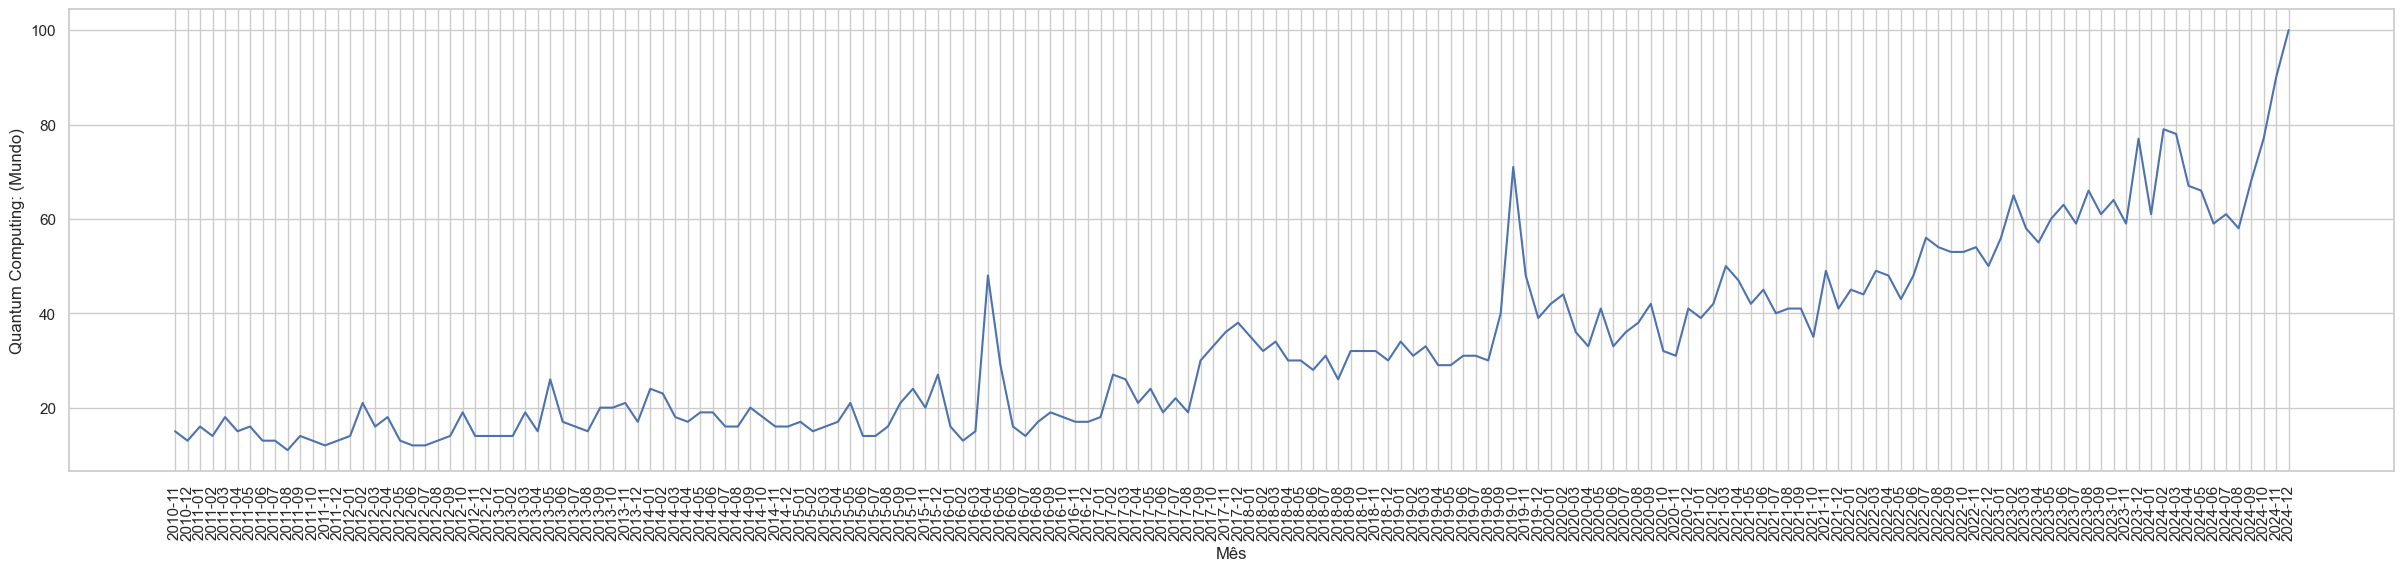

In [75]:
sns.set(style="whitegrid")
plt.figure(figsize=(30,6))

sns.lineplot(data=data, x="Mês", y="Quantum Computing: (Mundo)")
plt.xticks(rotation=90)
plt.show()

### -